In [80]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [81]:
df = pd.read_excel('/Users/ved/Downloads/CompiledData4240.xlsx', sheet_name = 'Trimmed Complete Data Sheet')

df.head()

,Geographic Area,Unnamed: 1,Total Revenue,Total Expenditure,Federal Revenue,State Revenue,Local Revenue,Instructional Spending,Support System Spending,Per Pupil Instructional,...,Past 8th Grade Score Avg,Past 4th Grade Score Avg,Past Overall Score Avg,8th Grade Math Score Avg,4th Grade Math Score Avg,8th Grade Reading Score Avg,4th Grade Reading Score Avg,8th Grade Score Avg,4th Grade Score Avg,Overall Score Avg
0,Alabama,NaN,7067527,7189784,689072,4070949,2307506,3653466,2174210,4911,...,251.0,251.0,251.0,266.000110,228.520018,251.936881,216.388954,258.968496,222.454486,240.711491
1,Alaska,NaN,1800585,1938755,282270,1052357,465958,927307,645857,7014,...,251.0,251.0,251.0,282.557154,237.273893,258.798456,214.476954,270.677805,225.875424,248.276614
2,Arizona,NaN,8684961,8710325,953912,4204391,3526658,3978237,2656754,4102,...,251.0,251.0,251.0,275.548426,231.936934,254.828792,209.520624,265.188609,220.728779,242.958694
3,Arkansas,NaN,4402548,4594295,483689,3319032,599827,2337780,1400984,4920,...,251.0,251.0,251.0,273.899862,237.670687,257.960996,217.027818,265.930429,227.349253,246.639841
4,California,NaN,70076641,70487984,7200297,42333590,20542754,34684981,20655175,5508,...,251.0,251.0,251.0,270.381784,230.034091,251.287792,208.522186,260.834788,219.278139,240.056463


In [82]:
df.shape

(300, 34)

In [83]:
df.describe()

,Unnamed: 1,Total Revenue,Total Expenditure,Federal Revenue,State Revenue,Local Revenue,Instructional Spending,Support System Spending,Per Pupil Instructional,Per Pupil Support Systems,...,Past 8th Grade Score Avg,Past 4th Grade Score Avg,Past Overall Score Avg,8th Grade Math Score Avg,4th Grade Math Score Avg,8th Grade Reading Score Avg,4th Grade Reading Score Avg,8th Grade Score Avg,4th Grade Score Avg,Overall Score Avg
count,0.0,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,300.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,NaN,1.224340e+07,1.228317e+07,1.127396e+06,5.698385e+06,5.417615e+06,6.506155e+06,3.685948e+06,6634.720000,3951.973333,...,269.983190,234.219970,252.101580,282.805408,240.393282,264.824368,221.148361,273.814888,230.770822,252.292855
std,NaN,1.472608e+07,1.486260e+07,1.482914e+06,6.970299e+06,6.883106e+06,8.076095e+06,4.254743e+06,1970.349257,1133.827929,...,10.266373,9.053939,5.284516,7.066554,5.377369,5.754855,6.051932,6.216054,5.484998,5.694236
min,NaN,1.001831e+06,9.824280e+05,9.708600e+04,3.556620e+05,4.784800e+04,5.237780e+05,2.838330e+05,3604.000000,1729.000000,...,251.000000,217.710948,237.594096,264.890919,227.262261,250.063570,205.756405,257.477244,217.710948,237.594096
25%,NaN,3.236699e+06,3.233400e+06,3.471325e+05,1.954124e+06,1.195671e+06,1.735860e+06,9.913392e+05,5276.250000,3121.250000,...,264.185282,228.274528,249.851269,278.090740,236.800877,260.362240,216.980571,269.867344,226.870715,248.245178
50%,NaN,7.611688e+06,7.795684e+06,7.025455e+05,3.647984e+06,2.843344e+06,3.830234e+06,2.416043e+06,6094.000000,3676.500000,...,273.161533,232.943083,251.896452,283.705370,240.721827,265.833886,222.268194,274.766242,231.642791,253.196647
75%,NaN,1.441164e+07,1.410228e+07,1.199362e+06,7.149669e+06,6.258343e+06,7.729787e+06,4.270743e+06,7625.750000,4571.500000,...,277.388729,237.049162,255.632224,287.710541,243.906145,268.707194,225.137351,278.097937,234.587758,256.166768
max,NaN,8.910905e+07,8.682812e+07,9.990221e+06,5.104651e+07,3.774841e+07,4.514133e+07,2.757241e+07,16113.000000,8174.000000,...,288.788897,251.000000,266.012818,300.568235,253.420961,277.782589,236.773867,288.788897,245.085161,266.012818


In [84]:
df[["Total Revenue", "Federal Revenue", "State Revenue", "Local Revenue", "Instructional Spending", "Support System Spending", "Per Pupil Instructional", "Pupils", "Instructional Staff", "General Admin", "School Admin", "PP&E", "Transportation", "Other", "Construction", "Instructional Equipment", "Overall Score Avg", "Past Overall Score Avg"]] = df[["Total Revenue", "Federal Revenue", "State Revenue", "Local Revenue", "Instructional Spending", "Support System Spending", "Per Pupil Instructional", "Pupils", "Instructional Staff", "General Admin", "School Admin", "PP&E", "Transportation", "Other", "Construction", "Instructional Equipment", "Overall Score Avg", "Past Overall Score Avg"]]/df[["Total Revenue", "Federal Revenue", "State Revenue", "Local Revenue", "Instructional Spending", "Support System Spending", "Per Pupil Instructional", "Pupils", "Instructional Staff", "General Admin", "School Admin", "PP&E", "Transportation", "Other", "Construction", "Instructional Equipment", "Overall Score Avg", "Past Overall Score Avg"]].max()
# normalization
df.head()

,Geographic Area,Unnamed: 1,Total Revenue,Total Expenditure,Federal Revenue,State Revenue,Local Revenue,Instructional Spending,Support System Spending,Per Pupil Instructional,...,Past 8th Grade Score Avg,Past 4th Grade Score Avg,Past Overall Score Avg,8th Grade Math Score Avg,4th Grade Math Score Avg,8th Grade Reading Score Avg,4th Grade Reading Score Avg,8th Grade Score Avg,4th Grade Score Avg,Overall Score Avg
0,Alabama,NaN,0.079313,7189784,0.068975,0.079750,0.061129,0.080934,0.078855,0.304785,...,251.0,251.0,0.943564,266.000110,228.520018,251.936881,216.388954,258.968496,222.454486,0.904887
1,Alaska,NaN,0.020207,1938755,0.028255,0.020616,0.012344,0.020542,0.023424,0.435301,...,251.0,251.0,0.943564,282.557154,237.273893,258.798456,214.476954,270.677805,225.875424,0.933326
2,Arizona,NaN,0.097464,8710325,0.095485,0.082364,0.093425,0.088128,0.096356,0.254577,...,251.0,251.0,0.943564,275.548426,231.936934,254.828792,209.520624,265.188609,220.728779,0.913335
3,Arkansas,NaN,0.049406,4594295,0.048416,0.065020,0.015890,0.051788,0.050811,0.305344,...,251.0,251.0,0.943564,273.899862,237.670687,257.960996,217.027818,265.930429,227.349253,0.927173
4,California,NaN,0.786414,70487984,0.720735,0.829314,0.544202,0.768364,0.749125,0.341836,...,251.0,251.0,0.943564,270.381784,230.034091,251.287792,208.522186,260.834788,219.278139,0.902424


In [85]:
X = df[["Total Revenue", "Federal Revenue", "State Revenue", "Local Revenue", "Instructional Spending", "Support System Spending", "Per Pupil Instructional", "Pupils", "Instructional Staff", "General Admin", "School Admin", "PP&E", "Transportation", "Other", "Construction", "Instructional Equipment", "Past Overall Score Avg"]].values
y = df['Overall Score Avg'].values

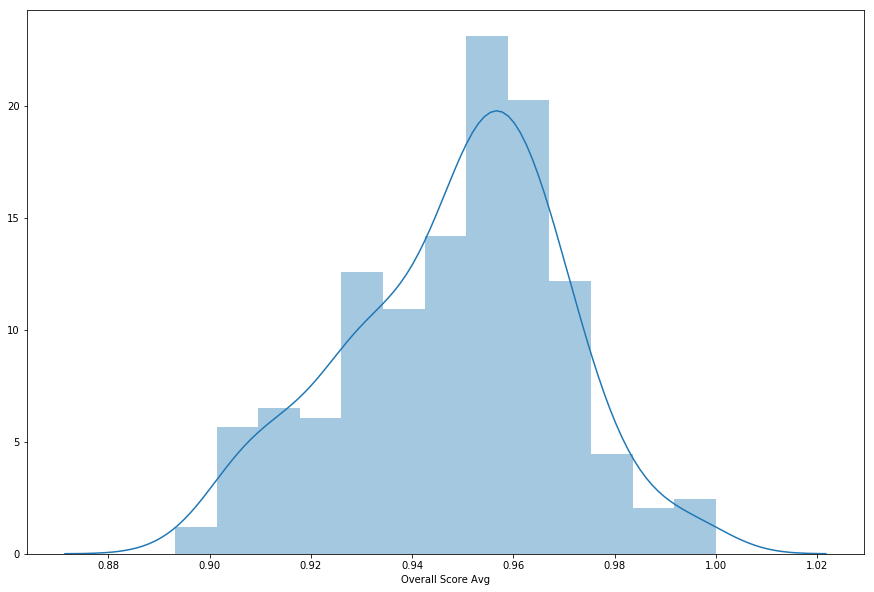

In [86]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df['Overall Score Avg'])

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [88]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [89]:
coeff_df = pd.DataFrame(regressor.coef_, ["Total Revenue", "Federal Revenue", "State Revenue", "Local Revenue", "Instructional Spending", "Support System Spending", "Per Pupil Instructional", "Pupils", "Instructional Staff", "General Admin", "School Admin", "PP&E", "Transportation", "Other", "Construction", "Instructional Equipment", "Past Overall Score Avg"], columns=['Coefficient'])  
coeff_df #arbitrary value to check coeffecients sizes relative to one another

,Coefficient
Total Revenue,0.068208
Federal Revenue,0.018329
State Revenue,0.042310
Local Revenue,0.098948
Instructional Spending,-0.101131
Support System Spending,-0.012740
Per Pupil Instructional,0.010533
Pupils,0.010974
Instructional Staff,0.038854
General Admin,-0.013069


In [90]:
y_pred = regressor.predict(X_test)

In [91]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1.head(15)

,Actual,Predicted
0,0.947849,0.967230
1,0.953890,0.953785
2,0.939802,0.946399
3,0.934824,0.945832
4,0.931551,0.935758
5,0.939897,0.946219
6,0.904593,0.912214
7,0.964344,0.972236
8,0.916223,0.908435
9,0.943858,0.961359


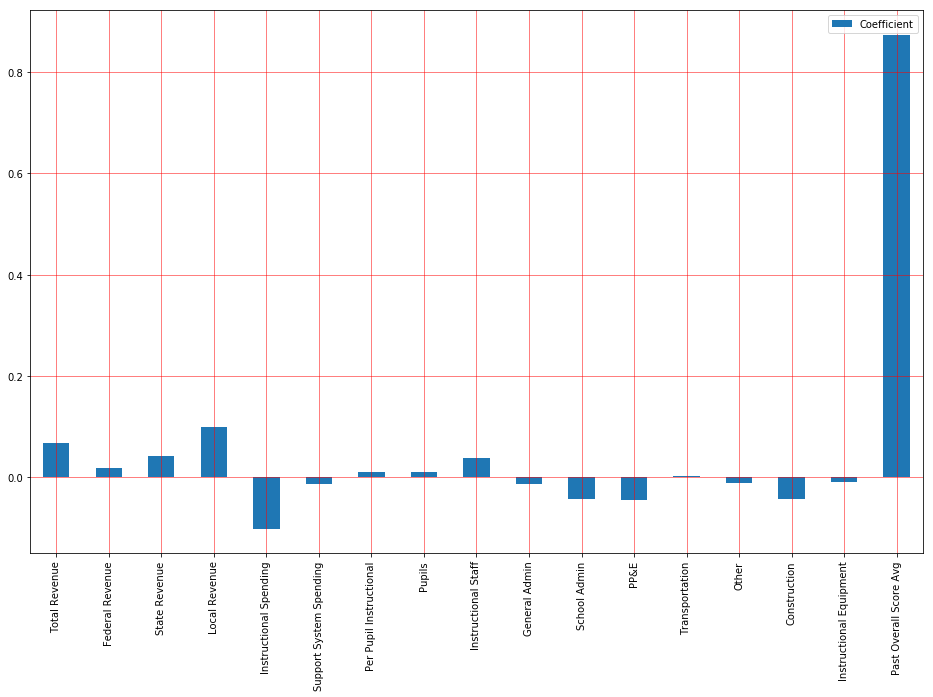

In [92]:
coeff_df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [93]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# RMSE more accurate as closer to 0

Mean Absolute Error: 0.007837544000090114
Mean Squared Error: 0.00010575629839919298
Root Mean Squared Error: 0.010283788134690105


In [94]:
# It seems that past scores are most highly correlated to future performance
# Plotting the data for visualization

In [95]:
# coeff_df.plot(kind='scatter',figsize=(16,10))
# plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()

# from pandas.plotting import scatter_matrix
# scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

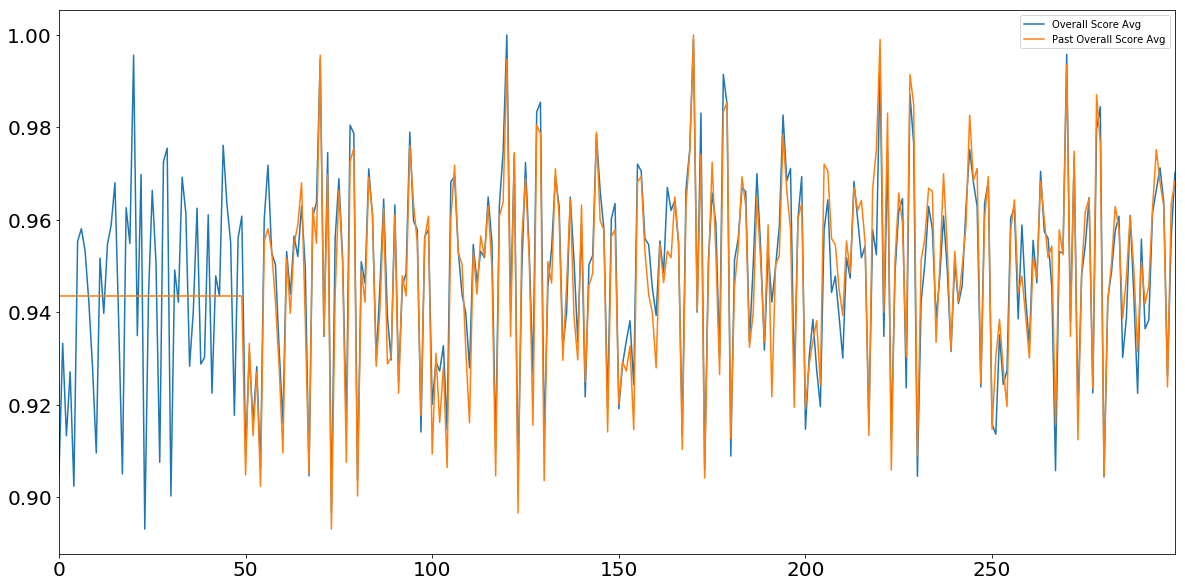

In [96]:
df[['Overall Score Avg','Past Overall Score Avg']].plot(fontsize=20,figsize=(20,10))

In [97]:
correlations = df.corr()
correlations = correlations['Overall Score Avg']
print(correlations)

Unnamed: 1                               NaN
Total Revenue                      -0.038494
Total Expenditure                  -0.041681
Federal Revenue                    -0.185448
State Revenue                      -0.097902
Local Revenue                       0.056740
Instructional Spending             -0.019178
Support System Spending            -0.042717
Per Pupil Instructional             0.398349
Per Pupil Support Systems           0.305609
Pupils                              0.012668
Instructional Staff                -0.078764
General Admin                       0.058590
School Admin                       -0.091458
PP&E                               -0.048792
Transportation                      0.049291
Other                              -0.106241
Construction                       -0.133633
Instructional Equipment             0.112805
Past 8th Grade Math Score Avg       0.475891
Past 4th Grade Math Score Avg       0.584823
Past 8th Grade Reading Score Avg    0.649032
Past 4th G

Alabama                AxesSubplot(0.1,0.820213;0.097561x0.0797872)
Alaska            AxesSubplot(0.217073,0.820213;0.097561x0.0797872)
Arizona           AxesSubplot(0.334146,0.820213;0.097561x0.0797872)
Arkansas           AxesSubplot(0.45122,0.820213;0.097561x0.0797872)
California        AxesSubplot(0.568293,0.820213;0.097561x0.0797872)
Colorado          AxesSubplot(0.685366,0.820213;0.097561x0.0797872)
Connecticut       AxesSubplot(0.802439,0.820213;0.097561x0.0797872)
Delaware               AxesSubplot(0.1,0.724468;0.097561x0.0797872)
Florida           AxesSubplot(0.217073,0.724468;0.097561x0.0797872)
Georgia           AxesSubplot(0.334146,0.724468;0.097561x0.0797872)
Hawaii             AxesSubplot(0.45122,0.724468;0.097561x0.0797872)
Idaho             AxesSubplot(0.568293,0.724468;0.097561x0.0797872)
Illinois          AxesSubplot(0.685366,0.724468;0.097561x0.0797872)
Indiana           AxesSubplot(0.802439,0.724468;0.097561x0.0797872)
Iowa                   AxesSubplot(0.1,0.628723;

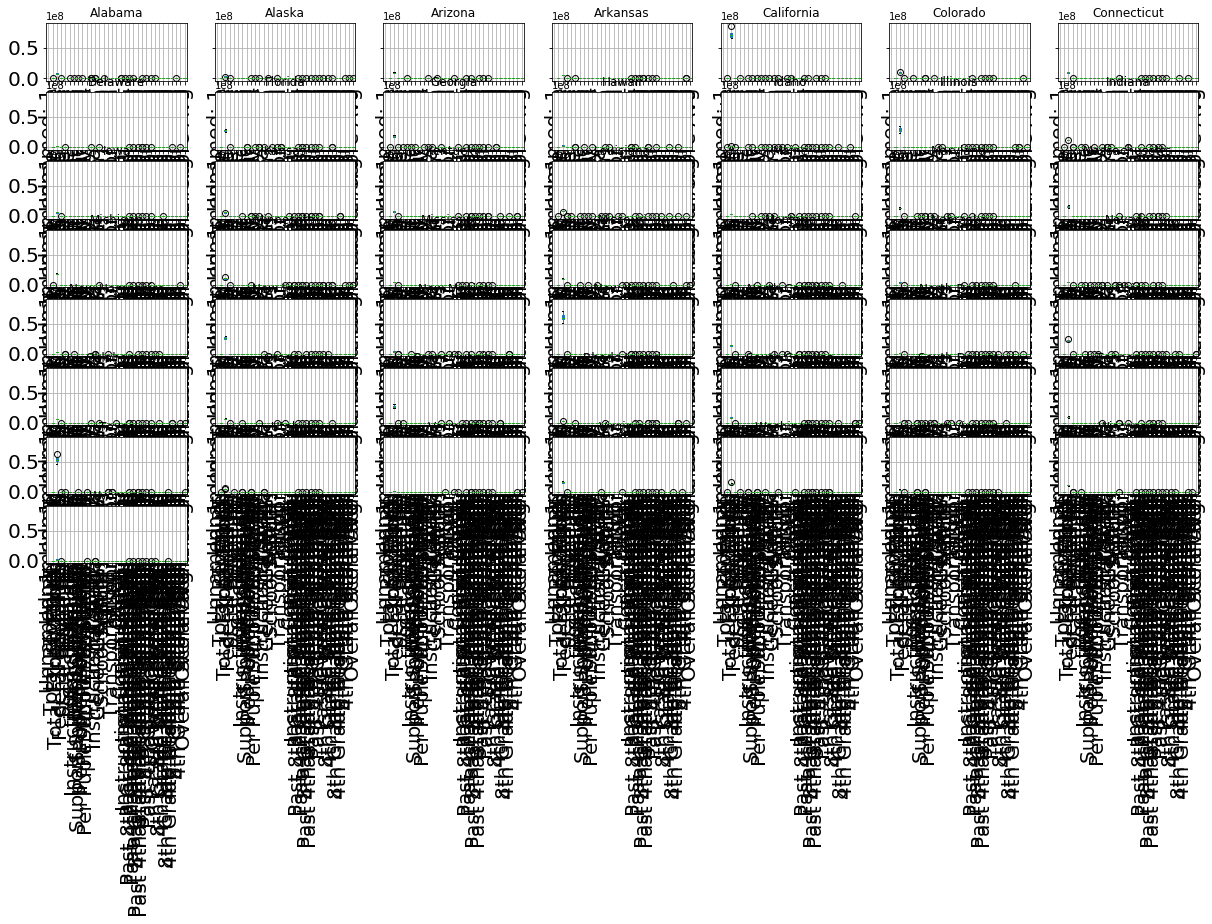

In [98]:
# df.plot.scatter(x='Overall Score Avg', y='Geographic Area')
df.groupby('Geographic Area').boxplot(fontsize=20,rot=90,figsize=(20,10),patch_artist=True)